In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from joypy import joyplot
import seaborn as sb
# from sklearn.model_selection import train_test_split 
# import warnings
# warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [2]:
index = pd.read_csv('data/index.csv')
subregion_codes = index[(index['country_code'] == 'US') & (index['aggregation_level']==1)]['subregion1_code'].unique()
state_indexes = list(map(lambda x: f'US_{x}', list(subregion_codes)))

counties = index[index['country_code'] == 'US'].copy()
counties['location_key'] = counties['country_code'] + '_' + counties['subregion1_code'] + '_' + counties['subregion2_code']
counties = counties[['location_key', 'subregion1_code']]
counties = counties.dropna()

In [ ]:
epidemiology = pd.read_csv('data/epidemiology.csv')

In [ ]:
demographics = pd.read_csv('data/demographics.csv')
state_demographics = demographics[demographics['location_key'].isin(state_indexes)]

county_demographics = counties.merge(demographics, on='location_key')

## New Confirmed Cases

In [ ]:
new_confirmed = epidemiology[['date', 'location_key', 'new_confirmed']]
new_confirmed = new_confirmed[new_confirmed['location_key'].isin(state_indexes)]
new_confirmed.rename({'new_confirmed':'New Confirmed Cases'},axis=1, inplace=True)
new_confirmed['date'] = pd.to_datetime(new_confirmed['date']).dt.date.astype(str)
new_confirmed['location_key'] = new_confirmed['location_key'].apply(lambda x: x[3:]) 
new_confirmed = new_confirmed.sort_values('date')
max_value = new_confirmed['New Confirmed Cases'].max()
new_confirmed = new_confirmed.drop(index=10148155)
new_confirmed

new_confirmed_county = epidemiology[['date', 'location_key', 'new_confirmed']]
new_confirmed_county = new_confirmed_county.merge(counties, on='location_key')
new_confirmed_county = new_confirmed_county[new_confirmed_county['subregion1_code'] == 'RI'] # Limit to RI
new_confirmed_county.rename({'new_confirmed':'New Confirmed Cases'},axis=1, inplace=True)
new_confirmed_county['date'] = pd.to_datetime(new_confirmed_county['date']).dt.date.astype(str)
new_confirmed_county['location_key'] = new_confirmed_county['location_key'].apply(lambda x: x[-5:]) 
new_confirmed_county = new_confirmed_county.sort_values('date')
new_confirmed_county = new_confirmed_county.dropna()
print(new_confirmed_county)

In [ ]:
fig = px.choropleth(new_confirmed,
                    locations='location_key',
                    locationmode='USA-states',
                    color='New Confirmed Cases',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    geojson_counties = json.load(response)

fig = px.choropleth(new_confirmed_county,
                    geojson=geojson_counties,
                    locations='location_key',
                    locationmode='geojson-id',
                    color='New Confirmed Cases',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

In [ ]:
sd = state_demographics.loc[:]
sd['location_key'] = sd['location_key'].apply(lambda x: x[3:])
sd = sd[['location_key', 'population']]

merged_cases = new_confirmed.merge(sd, on='location_key')

merged_cases['New Percentage Infected'] = merged_cases['New Confirmed Cases'] * 100 / merged_cases['population']
merged_cases = merged_cases[['New Percentage Infected', 'location_key', 'date']]

In [ ]:

fig = px.choropleth(merged_cases,
                    locations='location_key',
                    locationmode='USA-states',
                    color='New Percentage Infected',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

### New Confirmed Cases for the United States

In [ ]:
epidemiology[epidemiology['location_key'] == 'US']['new_confirmed'].plot()

## Cumulative Confirmed Cases

In [ ]:
cumulative_confirmed = epidemiology[['date', 'location_key', 'cumulative_confirmed']]
cumulative_confirmed = cumulative_confirmed[cumulative_confirmed['location_key'].isin(state_indexes)]
cumulative_confirmed.rename({'cumulative_confirmed':'Cumulative Confirmed Cases'},axis=1, inplace=True)
cumulative_confirmed['date'] = pd.to_datetime(cumulative_confirmed['date']).dt.date.astype(str)
cumulative_confirmed['location_key'] = cumulative_confirmed['location_key'].apply(lambda x: x[3:]) 
cumulative_confirmed = cumulative_confirmed.sort_values('date')
max_value = cumulative_confirmed['Cumulative Confirmed Cases'].max()
cumulative_confirmed = cumulative_confirmed.drop(index=10148155)
cumulative_confirmed

In [ ]:
fig = px.choropleth(cumulative_confirmed,
                    locations='location_key',
                    locationmode='USA-states',
                    color='Cumulative Confirmed Cases',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

In [ ]:
sd = state_demographics.loc[:]
sd['location_key'] = sd['location_key'].apply(lambda x: x[3:])
sd = sd[['location_key', 'population']]

merged_cases = cumulative_confirmed.merge(sd, on='location_key')

merged_cases['Cumulative Percentage Infected'] = merged_cases['Cumulative Confirmed Cases'] * 100 / merged_cases['population']
merged_cases = merged_cases[['Cumulative Percentage Infected', 'location_key', 'date']]

In [ ]:

fig = px.choropleth(merged_cases,
                    locations='location_key',
                    locationmode='USA-states',
                    color='Cumulative Percentage Infected',
                    color_continuous_scale='Viridis_r',
                    scope='usa',
                    animation_frame='date')
fig.show()

### New Confirmed Cases for the United States

In [ ]:
epidemiology[epidemiology['location_key'] == 'US']['cumulative_confirmed'].plot()

## Statewise Comparisons

### Hospitalizations per state

In [ ]:
hospitalizations = pd.read_csv('data/hospitalizations.csv')

In [ ]:
hospitalizations.columns

In [ ]:
# Categories to consider: cumulative_hospitalized_patients, cumulative_intensive_care_patients, cumulative_ventilator_patients at the end of the date range
# Normalize these based on the total population for that state
state_hospitalizations = hospitalizations[hospitalizations['location_key'].isin(state_indexes)]
cumulative_state_hospitalizations = state_hospitalizations[['date', 'location_key', 'cumulative_hospitalized_patients']]
final_cumulative_state_hospitalizations = cumulative_state_hospitalizations[cumulative_state_hospitalizations['date'] == '2022-09-15']
final_cumulative_state_hospitalizations = final_cumulative_state_hospitalizations.drop('date', axis=1) 

In [ ]:
indexed_final_cumulative_state_hospitalizations = final_cumulative_state_hospitalizations.set_index('location_key')
indexed_state_demographics = state_demographics[['location_key', 'population']].set_index('location_key')
joined_df = indexed_final_cumulative_state_hospitalizations.join(indexed_state_demographics)
joined_df['percentage'] = joined_df['cumulative_hospitalized_patients']/joined_df['population']*100
joined_df = joined_df.sort_values('percentage')
joined_df.index = map(lambda x: x[3:], joined_df.index)

plt.figure(figsize=(10,12))
joined_df['percentage'].plot(kind='barh')
plt.xlabel('Hospitalizations as a Percentage of Population (%)')
plt.ylabel('State')
plt.show()

In [ ]:
current_hospital_stats = state_hospitalizations[['date', 'location_key', 'current_hospitalized_patients', 'current_intensive_care_patients', 'current_ventilator_patients']]
current_hospital_stats = current_hospital_stats.drop('date', axis=1)
sum_of_current_hospital_stats = current_hospital_stats.groupby(['location_key']).sum()
sum_of_current_hospital_stats = pd.DataFrame(sum_of_current_hospital_stats)
indexed_state_demographics = state_demographics[['location_key', 'population']].set_index('location_key')
joined_sum_df = sum_of_current_hospital_stats.join(indexed_state_demographics)
joined_sum_df['current_hospitalized_patients'] = joined_sum_df['current_hospitalized_patients']/joined_sum_df['population']
joined_sum_df['current_intensive_care_patients'] = joined_sum_df['current_intensive_care_patients']/joined_sum_df['population']
joined_sum_df['current_ventilator_patients'] = joined_sum_df['current_ventilator_patients']/joined_sum_df['population']
joined_sum_df = joined_sum_df.drop('population', axis=1)
joined_sum_df = joined_sum_df.div(joined_sum_df.sum(axis=1),axis=0)
joined_sum_df = joined_sum_df.sort_values('current_hospitalized_patients')
joined_sum_df.index = map(lambda x: x[3:], joined_sum_df.index)

plt.figure(figsize=(10,12))
ax = plt.axes()
joined_sum_df.plot(kind='barh', stacked=True, ax=ax)
plt.xlabel('Fraction of Patients with Certain Status')
plt.ylabel('State')
plt.legend(['Hospitalizations', 'Intensive Care Patients', 'Ventiator Patients'])
plt.show()

### Age demographics

In [ ]:
import re
import math
from statistics import mean
from collections import defaultdict
from matplotlib import cm

age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
               'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
               'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

state_ages = demographics[demographics['location_key'].isin(['US_VT', 'US_WA', 'US_ME', 'US_OR', 'US_KY', 'US_OK', 'US_MT', 'US_FL'])]
state_ages = state_ages[['location_key', 'population'] + age_columns]
state_ages = state_ages.dropna()
state_ages[state_ages.columns.difference(['location_key', 'population'])] = state_ages[state_ages.columns.difference(['location_key', 'population'])].div(state_ages[state_ages.columns.difference(['location_key', 'population'])].sum(axis=1), axis=0)

data = defaultdict(list)
for index in state_ages.index:
    row = state_ages.loc[index].copy()
    
    counts = defaultdict(int)
    total_num = 1000
    for _ in range(total_num):
        col = row[age_columns].astype(float).idxmax()
        row[col] = row[col] - 1/total_num
        counts[col] += 1
    for column in age_columns:
        pattern = r'\d+'
        numbers = [int(match) for match in re.findall(pattern, column)]
        avg = math.ceil(mean(numbers)) + 1
        data[row['location_key']] += [avg for _ in range(counts[column])] 

hist_df = pd.DataFrame.from_dict(data)

joyplot(hist_df, hist = True, bins = len(age_columns), overlap=0)
plt.show()

In [ ]:
plt.hist(hist_df['US_FL'],alpha=0.2,label="Florida",bins=len(age_columns)-1,density=True, color="blue")
plt.hist(hist_df['US_VT'],alpha=0.2,label="Vermont",bins=len(age_columns)-1,density=True, color="red")
plt.legend()
plt.show()

In [ ]:
plt.hist(hist_df['US_FL'],alpha=0.2,label="Florida",bins=len(age_columns)-1,density=True, color="blue")
plt.hist(hist_df['US_KY'],alpha=0.2,label="Kentucky",bins=len(age_columns)-1,density=True, color="red")
plt.legend()
plt.show()

## Gender

## Vaccine Access

## Prepare Data

### Prepare feature data

In [36]:
# Load training and test features.

# Note: density is not included in data. However, population and square acreage (in geo) is available.
demographics = pd.read_csv('data/demographics.csv')
demographics['population_male'] = demographics['population_male'] / demographics['population'] * 100
demographics['population_female'] = demographics['population_female'] / demographics['population'] * 100
demographics['population_age_30_39'] = demographics['population_age_30_39'] / demographics['population'] * 100
demographics['population_age_40_49'] = demographics['population_age_40_49'] / demographics['population'] * 100
demographics['population_age_50_59'] = demographics['population_age_50_59'] / demographics['population'] * 100
demographics['population_age_60_69'] = demographics['population_age_60_69'] / demographics['population'] * 100
demographics['population_age_70_79'] = demographics['population_age_70_79'] / demographics['population'] * 100
demographics['population_age_80_and_older'] = demographics['population_age_80_and_older'] / demographics['population'] * 100
county_data = counties.merge(demographics[[
    'location_key',
    'population',
    'population_male',
    'population_female',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older',
]], on='location_key')

# Geographic data
geography = pd.read_csv('data/geography.csv')
county_data = county_data.merge(geography[[
    'location_key',
    'latitude',
    'longitude',
    'area_sq_km',
    'elevation_m'
]], on='location_key') # Elevation is NaN fairly often

# Remove population and sq_km in favor of density
county_data['pop_per_km'] = county_data['population'] / county_data['area_sq_km']
county_data.drop(columns=['area_sq_km', 'population'], inplace=True)

# Economic data from census
census_economic = pd.read_csv('data/census_economy.csv', encoding_errors='ignore')
census_economic.rename(columns={
    'Geography': 'fips',
    'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)': 'median_income',
    'Estimate!!Occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)': 'median_housing_cost'
    }, inplace=True)
census_economic = census_economic[[
    'fips', 
    'median_income',
    'median_housing_cost'
    ]]
census_economic['fips'] = census_economic['fips'].str.slice(start=-5)
county_data['fips'] = county_data['location_key'].str.slice(start=-5)
county_data = county_data.merge(census_economic[['fips', 'median_income', 'median_housing_cost']], on='fips')

# Insurance data from census
census_insured = pd.read_csv('data/census_insured.csv', encoding_errors='ignore')
census_insured.rename(columns={
    'Geography': 'fips',
    'Estimate!!Percent Insured!!Civilian noninstitutionalized population': 'percent_insured'
}, inplace=True)
census_insured['fips'] = census_economic['fips'].str.slice(start=-5)
county_data = county_data.merge(census_insured[['fips', 'percent_insured']], on='fips')

# Demographics data from census.
census_demographics= pd.read_csv('data/census_demographics.csv', encoding_errors='ignore')
census_demographics.rename(columns={
    'Geography': 'fips',
    '2021 Estimate!!RACE!!Total population!!One race!!White': 'white',
    '2021 Estimate!!RACE!!Total population!!One race!!Black or African American': 'black',
    '2021 Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native': 'native',
    '2021 Estimate!!RACE!!Total population!!One race!!Asian': 'asian',
    '2021 Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander': 'pacific',
    '2021 Estimate!!RACE!!Total population!!One race!!Some other race': 'other',
    '2021 Estimate!!RACE!!Total population!!Two or more races!!White and Black or African American': 'white and black',
    '2021 Estimate!!RACE!!Total population!!Two or more races!!White and American Indian and Alaska Native': 'white and native',
    '2021 Estimate!!RACE!!Total population!!Two or more races!!White and Asian': 'white and asian',
    '2021 Estimate!!RACE!!Total population!!Two or more races!!Black or African American and American Indian and Alaska Native': 'black and native',
}, inplace=True)
census_demographics['fips'] = census_demographics['fips'].str.slice(start=-5)
county_data = county_data.merge(census_demographics[[
    'fips', 
    'white',
    'black',
    'native',
    'asian',
    'pacific',
    'other',
    'white and black',
    'white and native',
    'white and asian',
    'black and native',
    ]], on='fips')

# TODO: Vaccinations is time data
vaccinations = pd.read_csv('data/vaccinations.csv')

print(county_data.shape[0])


C:\Users\robba\AppData\Local\Temp\ipykernel_892\869556926.py:57: DtypeWarning: Columns (226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221) have mixed types. Specify dtype option on import or set low_memory=False.
  census_insured = pd.read_csv('data/census_insured.csv', encoding_errors='ignore')
C:\Users\robba\AppData\Local\Temp\ipykernel_892\869556926.py:66: DtypeWarning: Columns (194,196,565,569,574,605,613,714,715,717,718,720,722,723,725,726,727,729,731,732,733,735,737,738,740,741,743,744,746,747,749,750,751,753,755,756,758,759,761,762,764,765,766,768,769,771,773,774,776,777,779,780,781,783,784,786,788,789,791,792,793,7

829


In [37]:
# Fill in missing elevation values from state values.
state_elevation = geography[geography['location_key'].isin(state_indexes)][['location_key', 'elevation_m']]
state_elevation['location_key'] = state_elevation['location_key'].apply(lambda x: x[3:])

def alter_row(row):
    if np.isnan(row['elevation_m']):
        subregion = row['subregion1_code']
        elevation = state_elevation[state_elevation['location_key'] == subregion]['elevation_m'].item()
        return elevation
    else:
        return row['elevation_m']

county_data['elevation_m'] = county_data.apply(lambda row: alter_row(row), axis=1)

In [38]:
# Drop columns for experimentation purposes.
county_data = county_data.drop(columns=['population_female'])
county_data = county_data.drop(columns=['population_male'])
county_data = county_data.drop(columns=['elevation_m'])

In [39]:
for column in ['white', 'black', 'native', 'asian', 'pacific', 'other', 'white and black', 'white and native', 'white and asian', 'black and native']:
    county_data[column] = pd.to_numeric(county_data[column], errors='coerce')

In [40]:
perc_missing_per_ftr = county_data.isnull().sum(axis=0)/county_data.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(county_data.isnull().sum(axis=1)!=0)/county_data.shape[0]
print('fraction of points with missing values:',frac_missing)

fraction of missing values in features:
population_age_30_39           0.012063
population_age_40_49           0.012063
population_age_50_59           0.012063
population_age_60_69           0.012063
population_age_70_79           0.012063
population_age_80_and_older    0.012063
white                          0.007238
black                          0.007238
native                         0.007238
asian                          0.007238
pacific                        0.007238
other                          0.007238
white and black                0.067551
white and native               0.067551
white and asian                0.067551
black and native               0.067551
dtype: float64
fraction of points with missing values: 0.06996381182147166


### Prepare labels

In [9]:
epidemiology = pd.read_csv('data/epidemiology.csv')

In [59]:
def gen_surge_data(date_begin, date_end):
    county_demographics = demographics[
        demographics['location_key'].isin(counties['location_key'].tolist())
    ][['location_key', 'population']]

    surge_begin = epidemiology[
        (epidemiology['location_key'].isin(counties['location_key'].tolist())) & 
        (epidemiology['date'] == date_begin)
    ][['location_key', 'cumulative_confirmed']]
    surge_begin.rename(columns={'cumulative_confirmed': 'cum_begin'}, inplace=True)

    surge_end = epidemiology[
        (epidemiology['location_key'].isin(counties['location_key'].tolist())) & 
        (epidemiology['date'] == date_end)
    ][['location_key', 'cumulative_confirmed']]
    surge_end.rename(columns={'cumulative_confirmed': 'cum_end'}, inplace=True)

    surge = surge_begin.merge(surge_end, on='location_key')
    surge['cumulative_confirmed'] = surge['cum_end'] - surge['cum_begin']

    merged = county_demographics.merge(surge, on='location_key')
    merged['cumulative_confirmed'] = merged['cumulative_confirmed'] / merged['population']
    merged.drop(columns=['population', 'cum_begin', 'cum_end'], inplace=True)
    return merged

surge_1 = gen_surge_data('2020-10-01', '2021-03-01')
surge_2 = gen_surge_data('2021-07-21', '2021-11-01')
surge_3 = gen_surge_data('2021-11-21', '2022-03-12')

<AxesSubplot:>

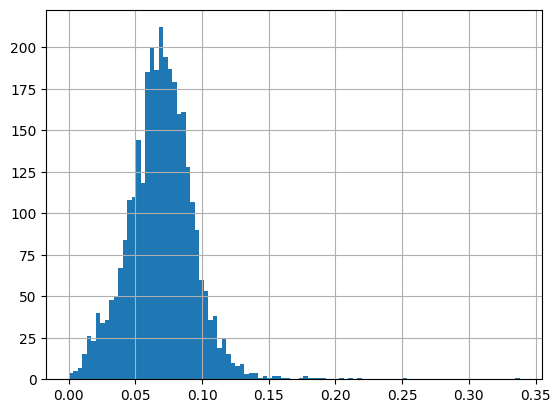

In [60]:
surge_1['cumulative_confirmed'].hist(bins = 100)

<AxesSubplot:>

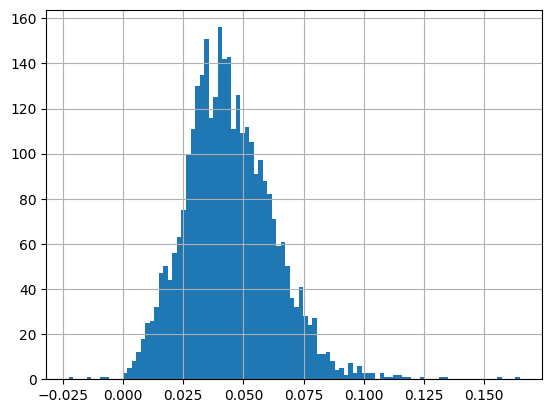

In [61]:
surge_2['cumulative_confirmed'].hist(bins = 100)

<AxesSubplot:>

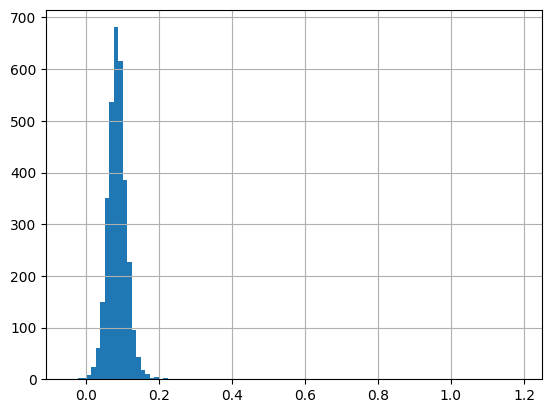

In [62]:
surge_3['cumulative_confirmed'].hist(bins = 100)

In [64]:
def missing_stats(data):
    perc_missing_per_ftr = data.isnull().sum(axis=0)/data.shape[0]
    print('fraction of missing values in features:')
    print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
    frac_missing = sum(data.isnull().sum(axis=1)!=0)/data.shape[0]
    print('fraction of points with missing values:',frac_missing)
missing_stats(surge_1)
missing_stats(surge_2)
missing_stats(surge_3)

fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


## Merge and clean

In [66]:
def merge_and_clean(data):
    data = county_data.merge(data, on='location_key')
    data = data.drop(columns=['fips', 'location_key', 'subregion1_code'])
    return data
surge_1 = merge_and_clean(surge_1)
surge_2 = merge_and_clean(surge_2)
surge_3 = merge_and_clean(surge_3)
surge_1

KeyError: 'location_key'

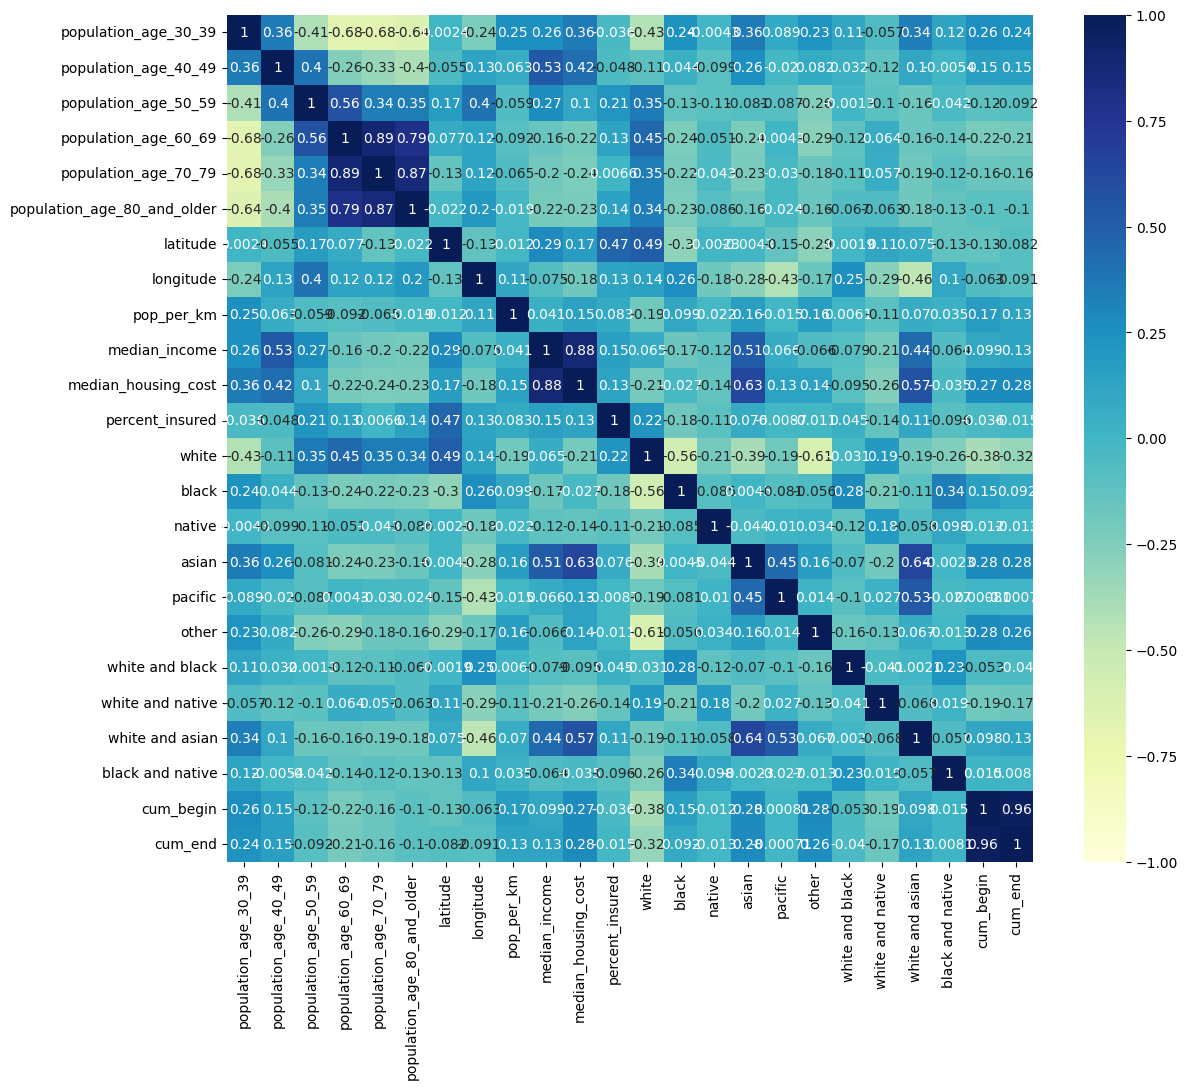

In [67]:
def show_heatmap(data):
    corr = data.drop(columns=['cumulative_confirmed']).corr()
    f, ax = plt.subplots(figsize=(13, 11))
    dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True, vmin=-1, vmax=1)
    plt.show()
show_heatmap(surge_1)

In [72]:
def finalize_data(data):
    X = data.drop(columns=['cumulative_confirmed'])
    y = data['cumulative_confirmed']
    feature_names = X.columns.tolist()
    return X, y, feature_names

X1, y1, feature_names_1 = finalize_data(surge_1)
X2, y2, feature_names_2 = finalize_data(surge_2)
X3, y3, feature_names_3 = finalize_data(surge_3)

# Training

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

def ML_pipeline(X, y, param_grid, fit_function, random_state):
    # first split to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.9, random_state=random_state)

    # second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size=0.5, random_state=random_state)

    # Preprocess features
    std_ftrs = X.columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[('std', StandardScaler(), std_ftrs)])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = pipeline.fit_transform(X_train)
    X_val_prep = pipeline.transform(X_val)
    X_test_prep = pipeline.transform(X_test)

    # we save the train and validation scores
    # the validation scores are necessary to select the best model
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []

    # loop through all combinations of hyperparameter combos
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print(f"\tCurrent parameters: {params}")
        eval_set = [(X_val_prep, y_val)]
        
        fit_model = fit_function(X_train_prep, y_train, eval_set, params)
        models.append(fit_model) # save it
        
        # calculate train and validation accuracy scores
        y_train_pred = fit_model.predict(X_train_prep)
        train_score[p] = mean_squared_error(y_train, y_train_pred)
        y_val_pred = fit_model.predict(X_val_prep)
        val_score[p] = mean_squared_error(y_val, y_val_pred)
        print('   ',train_score[p], val_score[p])

    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_model = models[np.argmax(val_score)]
    # calculate and save the test score
    y_test_pred = final_model.predict(X_test_prep)
    test_score = mean_squared_error(y_test,y_test_pred)
    print('test score:',test_score)
    return final_model, test_score, X_test_prep, y_test, feature_names

In [74]:
import xgboost

def XGB_fit_function(X_train_prep, y_train, eval_set, params):    
    XGB = xgboost.XGBRegressor(n_jobs=-1, verbosity = 0)
    XGB.set_params(**params)
    XGB.fit(X_train_prep, y_train, eval_set=eval_set, verbose=False) 
    return XGB

def gen_best_model(X, y, feature_names):
    num_random_states = 3

    XGB_test_scores = []
    XGB_models = []
    XGB_X_test_preps = []
    XGB_y_tests = []
    XGB_feature_names_list = []

    for i in range(num_random_states):
        print(f'Random state: {i}')
        random_state = i * 42
        XGB_param_grid = {
            "learning_rate": [0.03],
            "n_estimators": [100],
            "seed": [random_state], 
            "max_depth": [1,3,10],
            "colsample_bytree": [0.9],              
            "subsample": [0.66],
            "eval_metric": [mean_squared_error],
        }
        XGB_model, XGB_test_score, XGB_X_test_prep, XGB_y_test, XGB_feature_names = ML_pipeline(X, y, XGB_param_grid, XGB_fit_function, random_state)
        
        XGB_models.append(XGB_model)
        XGB_test_scores.append(XGB_test_score)
        XGB_X_test_preps.append(XGB_X_test_prep)
        XGB_y_tests.append(XGB_y_test)
        XGB_feature_names_list.append(XGB_feature_names)

    print(f'Mean of test scores: {np.mean(XGB_test_scores)}')
    print(f'STD of test scores: {np.std(XGB_test_scores)}')

    best_index = np.argmax(XGB_test_scores)
    best_model = XGB_models[best_index]
    return best_model
best_model_1 = gen_best_model(X1, y1, feature_names_1)
best_model_2 = gen_best_model(X2, y2, feature_names_2)
best_model_3 = gen_best_model(X3, y3, feature_names_3)

Random state: 0
	Current parameters: {'subsample': 0.66, 'seed': 0, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.03, 'eval_metric': <function mean_squared_error at 0x0000021820003310>, 'colsample_bytree': 0.9}
    0.0006943450367075619 0.0006637767626689291
	Current parameters: {'subsample': 0.66, 'seed': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.03, 'eval_metric': <function mean_squared_error at 0x0000021820003310>, 'colsample_bytree': 0.9}
    0.0006190434919104651 0.0006410027920571889
	Current parameters: {'subsample': 0.66, 'seed': 0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.03, 'eval_metric': <function mean_squared_error at 0x0000021820003310>, 'colsample_bytree': 0.9}
    0.0005828850749698169 0.0006744281002744664
best model parameters: {'subsample': 0.66, 'seed': 0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.03, 'eval_metric': <function mean_squared_error at 0x0000021820003310>, 'colsample_bytree': 0.9}
corresponding va

In [77]:
def show_feature_importance(model):
    for type in ["weight", "gain", "cover", "total_cover", "total_gain"]:
        importances = model.get_booster().get_score(importance_type=type)
        importances_keys = np.array(list(importances.keys()))
        importances_values = np.array(list(importances.values()))
        sorted_indcs = np.argsort(importances_values)[::-1][:10][::-1]

        plt.barh(list(range(10)), importances_values[sorted_indcs], align='center')
        plt.yticks(list(range(10)), np.array(feature_names)[sorted_indcs])
        plt.ylabel("Features")
        plt.xlabel("Feature importance")
        plt.title(f"XGBoost Feature Importance: {type}")
    #     plt.savefig(f'../figures/{tag}_xgboost_feature_importance_{type}.png', dpi=300, bbox_inches='tight')
        plt.show()

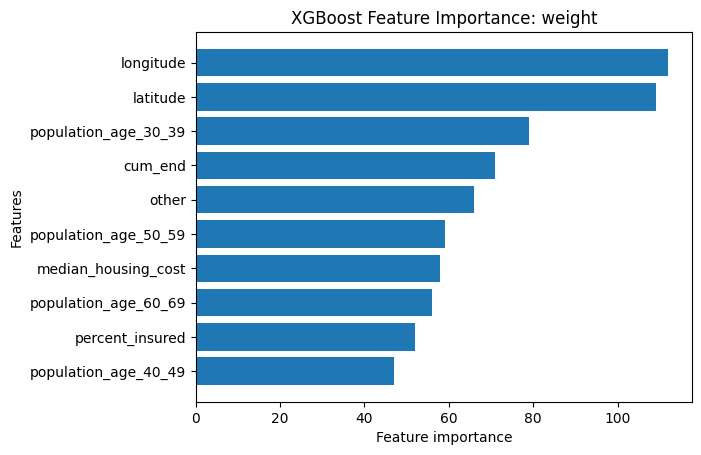

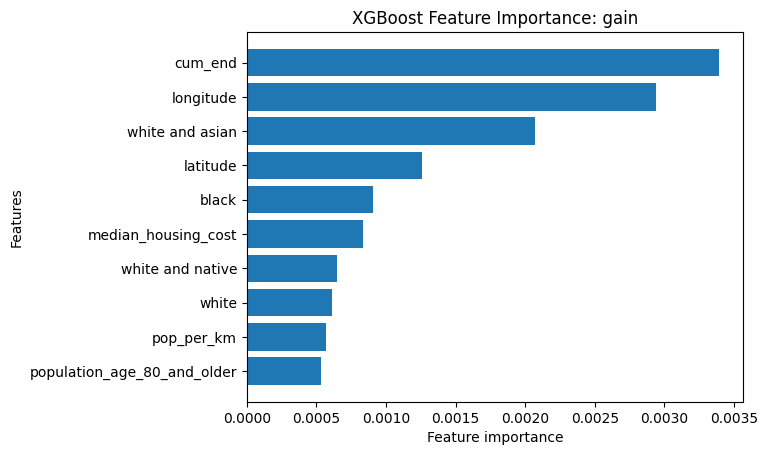

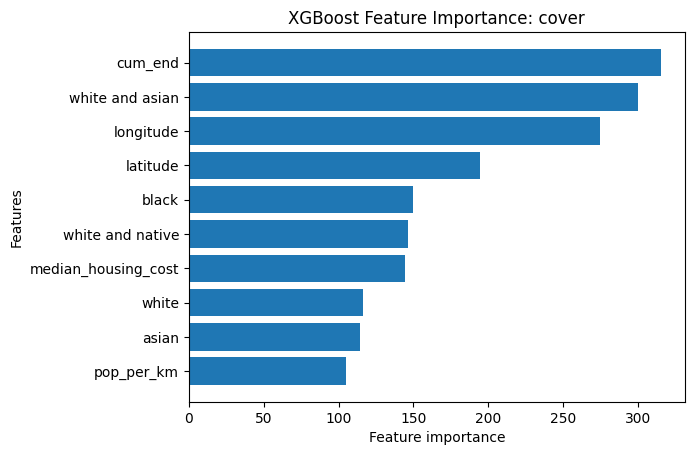

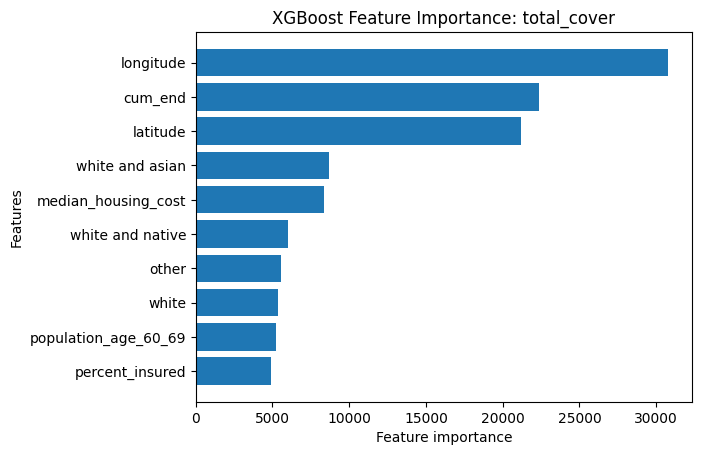

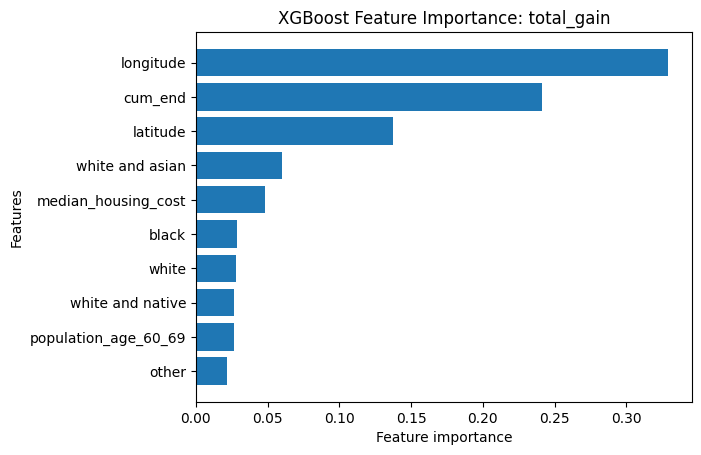

In [78]:
show_feature_importance(best_model_1)

In [ ]:
show_feature_importance(best_model_2)

In [ ]:
show_feature_importance(best_model_3)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.inspection import permutation_importance
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_curve
# import shap

# def understand_results(tag, model, test_score, X_test_prep, y_test, feature_names, 
#                        confusion_matrix=True, 
#                        roc_curve=False,
#                        permutation_feature_importance=False,
#                        xgboost_importances=False,
#                        shap_importance=False,
#                        shap_tree_importance=False):
#     if confusion_matrix:
#         disp = ConfusionMatrixDisplay.from_estimator(model, X_test_prep, y_test, display_labels=['Cancelled','LargeDelay','MediumDelay','OnTime','SlightDelay'], xticks_rotation='vertical')
#         disp.plot()
#         plt.title(f"{tag} Overall Confusion Matrix")
#         plt.tight_layout()
#         plt.xticks(rotation='vertical')
#         plt.savefig(f'../figures/{tag}_confusion_matrix.png', dpi=300, bbox_inches='tight')
#         plt.show()
        
#     if roc_curve:
#         fpr, tpr, p_crits = roc_curve(y_test, model.predict_proba(X_test_prep))
#         plt.plot(fpr,tpr)
#         plt.xlabel('fpr')
#         plt.ylabel('tpr')
#         plt.title(f'{tag} ROC curve')
#         plt.show()

#     if permutation_feature_importance:
#         y_pred = model.predict(X_test_prep)
#         result = permutation_importance(model, X_test_prep, y_test, n_repeats=10, random_state=0)
#         sorted_indcs = np.argsort(result.importances_mean)[::-1][:10][::-1]
#         plt.rcParams.update({'font.size': 13})
#         plt.boxplot(test_score-result.importances[sorted_indcs].T, labels=feature_names[sorted_indcs], vert=False)
#         plt.axvline(test_score, label='test score')
#         plt.title(f"{tag} Permutation Importances (test set)")
#         plt.xlabel('Score with perturbed feature')
#         plt.ylabel("Features")
#         plt.legend()
#         plt.tight_layout()
#         plt.savefig(f'../figures/{tag}_permutation_feature_importance.png', dpi=300, bbox_inches='tight')
#         plt.show()
    
#     if xgboost_importances:
#         for type in ["weight", "gain", "cover", "total_cover", "total_gain"]:
#             importances = model.get_booster().get_score(importance_type=type)
#             importances_keys = np.array(list(importances.keys()))
#             importances_values = np.array(list(importances.values()))
#             sorted_indcs = np.argsort(importances_values)[::-1][:10][::-1]

#             plt.barh(list(range(10)), importances_values[sorted_indcs], align='center')
#             plt.yticks(list(range(10)), feature_names[sorted_indcs])
#             plt.ylabel("Features")
#             plt.xlabel("Feature importance")
#             plt.title(f"XGBoost Feature Importance: {type}")
#             plt.savefig(f'../figures/{tag}_xgboost_feature_importance_{type}.png', dpi=300, bbox_inches='tight')
#             plt.show()
            
#     if shap_importance:
#         shap.initjs()
#         explainer = shap.KernelExplainer(model.predict_proba, X_test_prep)
#         shap_values = explainer.shap_values(X_test_prep)
#         shap.bar_plot(np.mean(np.abs(shap_values[0]), axis=0), feature_names=feature_names, max_display=10, show=False)
#         plt.title(f'{tag} SHAP Global Feature Importance')
#         plt.savefig(f'../figures/{tag}_shap_global.png', dpi=300, bbox_inches='tight')
#         plt.show()

#         index = 0
#         shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_prep[index, :], feature_names = feature_names, show=False, matplotlib=True)
#         plt.title(f'{tag} SHAP Local Feature Importance')
#         plt.savefig(f'../figures/{tag}_shap_local.png', dpi=300, bbox_inches='tight')
#         plt.show()

#     if shap_tree_importance:
#         shap.initjs()
#         explainer = shap.TreeExplainer(model)
#         shap_values = explainer.shap_values(X_test_prep)
#         shap.bar_plot(np.mean(np.abs(shap_values[0]), axis=0), feature_names=feature_names, max_display=10, show=False)
#         plt.title(f'{tag} SHAP Global Feature Importance')
#         plt.savefig(f'../figures/{tag}_shap_global.png', dpi=300, bbox_inches='tight')
#         plt.show()
        
#         index = 0
#         shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_prep[index, :], feature_names = feature_names, show=False, matplotlib=True)
#         plt.title(f'{tag} SHAP Local Feature Importance')
#         plt.savefig(f'../figures/{tag}_shap_local.png', dpi=300, bbox_inches='tight')
#         plt.show()
        